## Sequenza, FacetCNV → PycloneVI  (CNV는 일단 고려 안함)

0.13	0.03	chr10_117167765	MIR3663HG	intron_variant&non_coding_transcript_variant
0.02	0.4	chr11_105023156	CASP5	5_prime_UTR_variant
0.17	0.35	chr11_5901146	TRIM5	intron_variant
0.01	0.01	chr11_6545590	DNHD1	missense_variant
0.01	0.32	chr12_53251938	MFSD5	upstream_gene_variant
0.0	0.39	chr12_57488053	MARS1	upstream_gene_variant
0.19	0.43	chr15_34791073	ACTC1	intron_variant
0.01	0.33	chr15_63662023	HERC1	splice_acceptor_variant
0.01	0.35	chr16_2707255	KCTD5	intron_variant
0.18	0.22	chr16_31436088	ZNF843	synonymous_variant
0.18	0.28	chr20_35618686	SPAG4	missense_variant
0.01	0.4	chr20_63284965	ARFGAP1	intron_variant
0.01	0.23	chr21_33767859	ITSN1	intron_variant
0.19	0.37	chr22_29604051	NF2	frameshift_variant
0.01	0.24	chr2_151614518	NEB	missense_variant
0.01	0.52	chr2_218961004	CDK5R2	3_prime_UTR_variant
0.16	0.41	chr2_219023960	CFAP65	intron_variant
0.18	0.38	chr3_194652887	LSG1	frameshift_variant
0.14	0.3	chr3_49058071	QRICH1	intron_variant
0.14	0.35	chr3_51863268	IQCF2	synonymous_varia

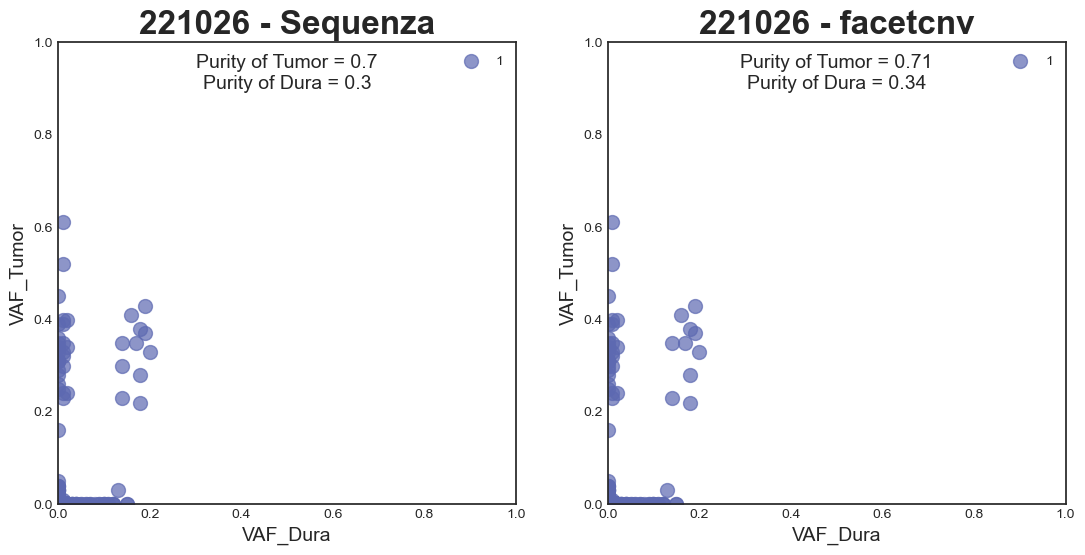

0.13	0.03	chr10_117167765	MIR3663HG	intron_variant&non_coding_transcript_variant
0.02	0.4	chr11_105023156	CASP5	5_prime_UTR_variant
0.17	0.35	chr11_5901146	TRIM5	intron_variant
0.01	0.01	chr11_6545590	DNHD1	missense_variant
0.01	0.32	chr12_53251938	MFSD5	upstream_gene_variant
0.0	0.39	chr12_57488053	MARS1	upstream_gene_variant
0.19	0.43	chr15_34791073	ACTC1	intron_variant
0.01	0.33	chr15_63662023	HERC1	splice_acceptor_variant
0.01	0.35	chr16_2707255	KCTD5	intron_variant
0.18	0.22	chr16_31436088	ZNF843	synonymous_variant
0.18	0.28	chr20_35618686	SPAG4	missense_variant
0.01	0.4	chr20_63284965	ARFGAP1	intron_variant
0.01	0.23	chr21_33767859	ITSN1	intron_variant
0.19	0.37	chr22_29604051	NF2	frameshift_variant
0.01	0.24	chr2_151614518	NEB	missense_variant
0.01	0.52	chr2_218961004	CDK5R2	3_prime_UTR_variant
0.16	0.41	chr2_219023960	CFAP65	intron_variant
0.18	0.38	chr3_194652887	LSG1	frameshift_variant
0.14	0.3	chr3_49058071	QRICH1	intron_variant
0.14	0.35	chr3_51863268	IQCF2	synonymous_varia

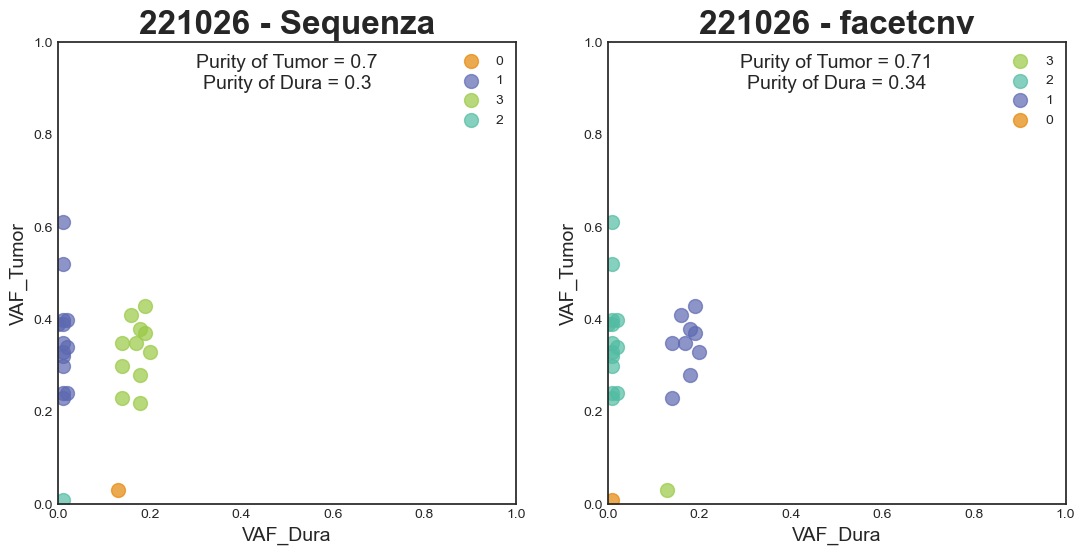

In [14]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


def visualization_decomposition( df, OUTPUT_SUPTITLE, ax ):
    ax.set_title(OUTPUT_SUPTITLE, fontsize = 24, fontweight='bold')
    ax.text(0.5, 0.9, "Purity of Tumor = {}\nPurity of Dura = {}".format(df[df['sample_id'].str.contains('Tumor')].iloc[0]["tumour_content"], df[df['sample_id'].str.contains('Dura')].iloc[0]["tumour_content"] ), ha='center', fontsize = 14 )
    ax.set_xlabel("VAF_Dura", fontdict = {"fontsize" : 14})
    ax.set_ylabel("VAF_Tumor", fontdict = {"fontsize" : 14})
    plt.style.use("seaborn-white")

    ax.set_xlim([0,  1])
    ax.set_ylim([0,  1])

    tabl = palettable.tableau.Tableau_20.mpl_colors
    vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    colorlist = [i for i in vivid_10]
    shapelist = ["o", "s", "^", "v", ">", "<"]


    k = 0
    set_cluster_id = set([])

    while k < df.shape[0] - 1:
        i = 0 if df.iloc[k]["types"] == "Mutect2" else 3
        if df.iloc[k]["mutation_id"] == df.iloc[k + 1]["mutation_id"]:       # 2-shared mutation인 경우
            vaf_Dura = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 2 )
            vaf_Tumor = round ( int (df.iloc[k + 1]["alt_counts"]) / ( int (df.iloc[k + 1]["ref_counts"]) +  int (df.iloc[k + 1 ]["alt_counts"])) , 2 )
            if df.iloc[k]["types"] == "Mutect2":
                print (vaf_Dura, vaf_Tumor, df.iloc[k]["mutation_id"], df.iloc[k]["gene"], df.iloc[k]["variant_classification"], sep = "\t")
            k2 = k + 2
        else:
            if "Dura" in df.iloc[k]["sample_id"]:
                vaf_Tumor = 0
                vaf_Dura = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 2 )
            elif "Tumor" in df.iloc[k]["sample_id"]:
                vaf_Tumor = round ( int (df.iloc[k]["alt_counts"]) / ( int (df.iloc[k]["ref_counts"]) +  int (df.iloc[k]["alt_counts"])) , 2 )
                vaf_Dura = 0
            k2 = k + 1
            
        ax.scatter (vaf_Dura, vaf_Tumor,  alpha = 0.7, color = colorlist [ df.iloc[k]["cluster_id"]], marker = shapelist[i], s = 100, label = df.iloc[k]["cluster_id"] if df.iloc[k]["cluster_id"] not in set_cluster_id else ""   )
        set_cluster_id.add ( df.iloc[k]["cluster_id"]  )

        #legend_without_duplicate_labels ( ax )
        k = k2
    
    ax.legend()
    print ("\n\n")
        
        

if __name__ == "__main__":
    import pandas as pd
    import matplotlib.pyplot as plt
    import palettable
    import numpy as np

    Sample_ID="221026"
    SEQUENZA_TO_PYCLONEVI_MATRIX_PATH="/home/goldpm1/Meningioma/31.Clonality/01.make_matrix/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH="/home/goldpm1/Meningioma/31.Clonality/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_MATRIX_PATH="/home/goldpm1/Meningioma/31.Clonality/01.make_matrix/"+ Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_OUTPUT_PATH="/home/goldpm1/Meningioma/31.Clonality/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"
    OUTPUT_PATH_SHARED="/home/goldpm1/Meningioma/31.Clonality/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".decomposed.png"
    OUTPUT_PATH_TOTAL="/home/goldpm1/Meningioma/31.Clonality/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".total.png"


    df_seq_to_pycl = pd.read_csv (SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH, sep = "\t")
    df_seq_to_pycl = df_seq_to_pycl.drop_duplicates (['mutation_id'], keep = 'first').sort_values ( ['mutation_id'], axis = 0, ascending = True)[ [ "mutation_id", "cluster_id"] ].reset_index().drop ('index', axis = 1)
    df_facet_to_pycl = pd.read_csv (FACETCNV_TO_PYCLONEVI_OUTPUT_PATH, sep = "\t")
    df_facet_to_pycl = df_facet_to_pycl.drop_duplicates (['mutation_id'], keep = 'first').sort_values ( ['mutation_id'], axis = 0, ascending = True)[ [ "mutation_id", "cluster_id"] ].reset_index().drop ('index', axis = 1)

    df_seq_matrix = pd.read_csv (SEQUENZA_TO_PYCLONEVI_MATRIX_PATH, sep = "\t")
    df_facet_matrix = pd.read_csv (FACETCNV_TO_PYCLONEVI_MATRIX_PATH, sep = "\t")


    fig, ax = plt.subplots( figsize=(13, 6), nrows = 1, ncols = 2 )
    visualization_decomposition ( pd.concat ( [ df_seq_matrix, pd.Series ([1] * df_seq_matrix.shape[0] , name = "cluster_id")], axis = 1), "{} - Sequenza".format(Sample_ID), ax[0] )
    visualization_decomposition ( pd.concat ( [ df_facet_matrix, pd.Series ([1] * df_facet_matrix.shape[0] , name = "cluster_id")], axis = 1), "{} - facetcnv".format(Sample_ID), ax[1] )
    plt.savefig ( OUTPUT_PATH_TOTAL )
    plt.show()
    
    
    fig, ax = plt.subplots( figsize=(13, 6), nrows = 1, ncols = 2 )
    df_seq_integrated = pd.merge (df_seq_matrix, df_seq_to_pycl, left_on = "mutation_id", right_on = "mutation_id")
    visualization_decomposition ( df_seq_integrated, "{} - Sequenza".format(Sample_ID), ax[0] )
    df_facet_integrated = pd.merge (df_facet_matrix, df_facet_to_pycl, left_on = "mutation_id", right_on = "mutation_id")
    visualization_decomposition ( df_facet_integrated, "{} - facetcnv".format(Sample_ID), ax[1] )
    plt.savefig ( OUTPUT_PATH_SHARED )
    plt.show()

In [19]:
pd.set_option('display.max_rows', 500) 
df_seq_integrated  [ df_seq_integrated["cluster_id"] == 1]
df_facet_integrated [ df_facet_integrated["cluster_id"] == 1]

,mutation_id,sample_id,ref_counts,alt_counts,normal_cn,major_cn,minor_cn,tumour_content,types,gene,variant_classification,cluster_id
4,chr11_5901146,221026_Dura,654,132,2,2,2,0.34,Mutect2,TRIM5,intron_variant,1
5,chr11_5901146,221026_Tumor,182,96,2,1,1,0.71,Mutect2,TRIM5,intron_variant,1
12,chr15_34791073,221026_Dura,198,45,2,1,1,0.34,Mutect2,ACTC1,intron_variant,1
13,chr15_34791073,221026_Tumor,45,34,2,1,1,0.71,Mutect2,ACTC1,intron_variant,1
18,chr20_35618686,221026_Dura,54,12,2,1,0,0.34,Mutect2,SPAG4,missense_variant,1
19,chr20_35618686,221026_Tumor,28,11,2,1,1,0.71,Mutect2,SPAG4,missense_variant,1
24,chr22_29604050,221026_Dura,208,50,2,1,0,0.34,Mutect2,NF2,frameshift_variant,1
25,chr22_29604050,221026_Tumor,67,39,2,1,0,0.71,Mutect2,NF2,frameshift_variant,1
30,chr2_219023960,221026_Dura,62,12,2,1,1,0.34,Mutect2,CFAP65,intron_variant,1
31,chr2_219023960,221026_Tumor,26,18,2,1,1,0.71,Mutect2,CFAP65,intron_variant,1
